In [13]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math
import pandas as pd
import imutils.paths as path
from tqdm import tqdm
import os
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
# import pip
# pip.main(['install','seaborn'])
sns.set()

In [14]:
enc = LabelEncoder()
datasets = pd.read_csv('F:/applications/python/Klasifikasi_Daun_Sawi/2_EKSTRAKSI_WARNA/datasetDataTraining.csv')
datasets['Label'] = enc.fit_transform(datasets['Label'].values)
datasets

,Citra,energy_0,homogenity_0,entrophy_0,contrast_0,energy_45,homogenity_45,entrophy_45,contrast_45,energy_90,...,entrophy_90,contrast_90,energy_135,homogenity_135,entrophy_135,contrast_135,Label,Warna_R,Warna_G,Warna_B
0,1.png,0.001033,17.871236,7.360620,16.871236,0.000736,37.274097,7.708917,36.274097,0.000944,...,7.448398,20.731886,0.000731,33.663376,7.690829,32.663376,0,0.239811,0.728622,0.000530
1,10.png,0.001623,14.459853,7.046904,13.459853,0.001078,23.535453,7.424661,22.535453,0.001300,...,7.180241,12.761809,0.001012,28.172632,7.450419,27.172632,0,0.000046,0.982006,0.015762
2,100.png,0.002920,5.739939,6.398762,4.739939,0.001843,18.810911,6.914203,17.810911,0.002322,...,6.688700,11.943413,0.001893,15.143661,6.859910,14.143661,0,0.002766,0.874546,0.096859
3,101.png,0.003383,3.999953,6.200812,2.999953,0.002321,9.230300,6.632160,8.230300,0.002653,...,6.513021,7.122109,0.002059,12.030593,6.752569,11.030593,0,0.003716,0.720688,0.229462
4,102.png,0.003391,5.682657,6.217107,4.682657,0.002490,10.934372,6.594616,9.934372,0.002791,...,6.473635,8.772694,0.002118,16.682133,6.707306,15.682133,0,0.002609,0.643875,0.312412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,95.png,0.001482,13.655299,7.068650,12.655299,0.001012,25.697072,7.427757,24.697072,0.001467,...,7.070679,12.333709,0.001170,23.048676,7.313190,22.048676,1,0.000000,0.990791,0.007183
795,96.png,0.001087,25.045009,7.382943,24.045009,0.000852,42.446473,7.623255,41.446473,0.001261,...,7.258726,20.768921,0.000897,39.623609,7.595251,38.623609,1,0.000198,0.999332,0.000183
796,97.png,0.002034,10.651257,6.940028,9.651257,0.001616,15.590236,7.154170,14.590236,0.002014,...,6.910891,8.423029,0.001481,19.437570,7.262905,18.437570,1,0.000000,0.999744,0.000221
797,98.png,0.001658,10.372622,7.010297,9.372622,0.001292,16.745123,7.244995,15.745123,0.001603,...,7.028658,9.957165,0.001220,20.034011,7.336727,19.034011,1,0.000000,0.998581,0.001194


In [15]:
datadaun = datasets.drop(columns= 'Label')
databersih = datadaun.drop(columns='Citra')
databersih

,energy_0,homogenity_0,entrophy_0,contrast_0,energy_45,homogenity_45,entrophy_45,contrast_45,energy_90,homogenity_90,entrophy_90,contrast_90,energy_135,homogenity_135,entrophy_135,contrast_135,Warna_R,Warna_G,Warna_B
0,0.001033,17.871236,7.360620,16.871236,0.000736,37.274097,7.708917,36.274097,0.000944,21.731886,7.448398,20.731886,0.000731,33.663376,7.690829,32.663376,0.239811,0.728622,0.000530
1,0.001623,14.459853,7.046904,13.459853,0.001078,23.535453,7.424661,22.535453,0.001300,13.761809,7.180241,12.761809,0.001012,28.172632,7.450419,27.172632,0.000046,0.982006,0.015762
2,0.002920,5.739939,6.398762,4.739939,0.001843,18.810911,6.914203,17.810911,0.002322,12.943413,6.688700,11.943413,0.001893,15.143661,6.859910,14.143661,0.002766,0.874546,0.096859
3,0.003383,3.999953,6.200812,2.999953,0.002321,9.230300,6.632160,8.230300,0.002653,8.122109,6.513021,7.122109,0.002059,12.030593,6.752569,11.030593,0.003716,0.720688,0.229462
4,0.003391,5.682657,6.217107,4.682657,0.002490,10.934372,6.594616,9.934372,0.002791,9.772694,6.473635,8.772694,0.002118,16.682133,6.707306,15.682133,0.002609,0.643875,0.312412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,0.001482,13.655299,7.068650,12.655299,0.001012,25.697072,7.427757,24.697072,0.001467,13.333709,7.070679,12.333709,0.001170,23.048676,7.313190,22.048676,0.000000,0.990791,0.007183
795,0.001087,25.045009,7.382943,24.045009,0.000852,42.446473,7.623255,41.446473,0.001261,21.768921,7.258726,20.768921,0.000897,39.623609,7.595251,38.623609,0.000198,0.999332,0.000183
796,0.002034,10.651257,6.940028,9.651257,0.001616,15.590236,7.154170,14.590236,0.002014,9.423029,6.910891,8.423029,0.001481,19.437570,7.262905,18.437570,0.000000,0.999744,0.000221
797,0.001658,10.372622,7.010297,9.372622,0.001292,16.745123,7.244995,15.745123,0.001603,10.957165,7.028658,9.957165,0.001220,20.034011,7.336727,19.034011,0.000000,0.998581,0.001194


In [16]:
datalabel = datasets['Label']
datalabel.value_counts()

Label
0    400
1    399
Name: count, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer


vec = TfidfVectorizer(lowercase=True)
X = vec.fit_transform(datadaun["Citra"])

xtrain, xtest, ytrain, ytest = train_test_split(databersih, datalabel, test_size=0.3, random_state=15)
tree_dataset = DecisionTreeClassifier(random_state=15)
tree_dataset.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=15)

Nilai Akurasi Algoritma C4.5
Akurasi               precision    recall  f1-score   support

           0       0.65      0.66      0.65       111
           1       0.70      0.70      0.70       129

    accuracy                           0.68       240
   macro avg       0.68      0.68      0.68       240
weighted avg       0.68      0.68      0.68       240

Tingkat Akurasi : 67 persen


Confusion Matrix


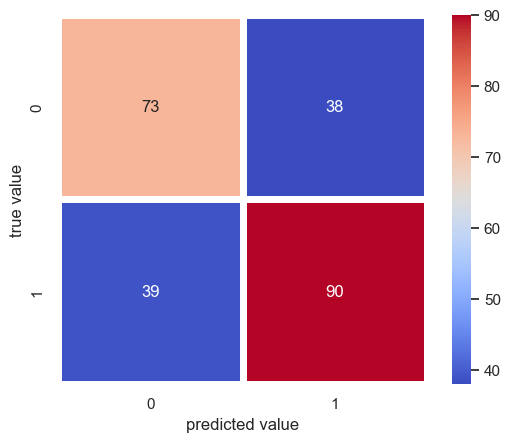

In [18]:
import warnings
warnings.filterwarnings('always') 

yprediction = tree_dataset.predict(xtest)
cm = confusion_matrix(ytest, yprediction)



nilaiakurasi = classification_report(ytest, yprediction)
print("Nilai Akurasi Algoritma C4.5")
print("Akurasi", nilaiakurasi)

nilaiakurasi = accuracy_score(ytest, yprediction)
print("Tingkat Akurasi : %d persen" %(nilaiakurasi*100))

print('\n')
print("Confusion Matrix")
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap='coolwarm', linewidths=5)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()